# Trabalhando com Planilhas


In [ ]:
# Importando a biblioteca Pandas
import pandas as pd

In [ ]:
# Leitura de arquivos
df1 = pd.read_excel("/content/drive/MyDrive/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/datasets/Salvador.xlsx")

In [ ]:
# Juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [ ]:
# Exebindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
# Exibindo as 5 ultimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
# Verificando o tipo de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
# Amostra do conjunto de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
186,Salvador,2019-01-02,169.09,1036,2
98,Aracaju,2018-01-01,138.33,1521,10
85,Recife,2019-01-01,182.52,983,1
178,Natal,2019-01-02,39.28,1037,3
76,Aracaju,2018-01-01,33.51,1523,4


In [ ]:
# Alterando o tipo de dado da coluna LojaId
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

## Tratando valores faltantes

In [ ]:
# Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
# Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
# Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

## Criando colunas novas

In [ ]:
# Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08
...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84
236,Salvador,2019-01-03,126.29,1035,3,378.87
237,Salvador,2019-01-03,38.06,1036,3,114.18
238,Salvador,2019-01-03,139.64,1035,1,139.64


In [ ]:
df["Receitas/Vendas"] = df["Receita"] / df["Vendas"]

In [ ]:
df

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0
...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,1.0
236,Salvador,2019-01-03,126.29,1035,3,378.87,3.0
237,Salvador,2019-01-03,38.06,1036,3,114.18,3.0
238,Salvador,2019-01-03,139.64,1035,1,139.64,1.0


In [ ]:
# Retornando a maior receita
df["Receita"].max()

3544.0

In [ ]:
# Retornando a menor receita
df["Receita"].min()

3.34

In [ ]:
# nlargest retorna o top 3 com base na coluna escolhida

In [ ]:
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
# nsmallest retorna as 3 piores receitas

In [ ]:
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
# Agrupamento por cidade

In [ ]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
# Ordenando o conjunto de dados

In [ ]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


## Trabalhando com datas



In [ ]:
# Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
# Verificando o tipo de dado da coluna
df.dtypes

Cidade              object
Data                 int64
Vendas             float64
LojaID              object
Qtde                 int64
Receita            float64
Receitas/Vendas    float64
dtype: object

In [ ]:
# Transformando a coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade                     object
Data               datetime64[ns]
Vendas                    float64
LojaID                     object
Qtde                        int64
Receita                   float64
Receitas/Vendas           float64
dtype: object

In [ ]:
# Agrupando por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
# Criando uma nova coluna com ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018
...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,1.0,2019
236,Salvador,2019-01-03,126.29,1035,3,378.87,3.0,2019
237,Salvador,2019-01-03,38.06,1036,3,114.18,3.0,2019
238,Salvador,2019-01-03,139.64,1035,1,139.64,1.0,2019


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda
31,Recife,2019-01-01,176.23,981,7,1233.61,7.0,2019
1,Natal,2018-11-25,563.00,853,2,1126.00,2.0,2018
86,Recife,2019-01-01,17.83,982,8,142.64,8.0,2019
175,Salvador,2019-01-02,16.53,1036,2,33.06,2.0,2019
92,Aracaju,2018-01-01,37.46,1520,7,262.22,7.0,2018


In [ ]:
# Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)
df

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,1,1
...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,1.0,2019,1,3
236,Salvador,2019-01-03,126.29,1035,3,378.87,3.0,2019,1,3
237,Salvador,2019-01-03,38.06,1036,3,114.18,3.0,2019,1,3
238,Salvador,2019-01-03,139.64,1035,1,139.64,1.0,2019,1,3


In [ ]:
# Retorna a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
# Retorna a data mais atual
df["Data"].max()

Timestamp('2019-04-05 00:00:00')

In [ ]:
# Calculando diferença de dias
df["Diferença de Dias"] = df["Data"] - df["Data"].min()


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,Diferença de Dias
137,Recife,2019-03-02,51.99,983,3,155.97,3.0,2019,3,2,425 days
0,Natal,2018-08-27,606.00,853,2,1212.00,2.0,2018,8,27,238 days
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days
92,Salvador,2019-01-01,4.57,1035,1,4.57,1.0,2019,1,1,365 days
63,Fortaleza,2019-01-01,118.17,1004,1,118.17,1.0,2019,1,1,365 days


In [ ]:
# Criando a coluna trimestre
df["trimestre venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,Diferença de Dias,Semestre venda,trimestre venda
86,Natal,2019-01-02,156.47,1037,3,469.41,3.0,2019,1,2,366 days,1,1
161,Salvador,2019-01-02,5.80,1036,1,5.80,1.0,2019,1,2,366 days,1,1
146,Natal,2019-01-02,149.88,1037,1,149.88,1.0,2019,1,2,366 days,1,1
217,Salvador,2019-01-02,37.65,1036,2,75.30,2.0,2019,1,2,366 days,1,1
71,Salvador,2019-01-01,21.36,1035,2,42.72,2.0,2019,1,1,365 days,1,1


In [ ]:
df.drop(columns=["Semestre venda"])

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,Diferença de Dias,trimestre venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,1,1,0 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,1.0,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,3.0,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,3.0,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,1.0,2019,1,3,367 days,1


In [ ]:
# Filtrando as vendas do mês de março de 2019

In [ ]:
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,Diferença de Dias,Semestre venda,trimestre venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1,1


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,Diferença de Dias,Semestre venda,trimestre venda
167,Salvador,2019-01-02,36.42,1037,1,36.42,1.0,2019,1,2,366 days,1,1
133,Salvador,2019-03-02,153.71,1035,1,153.71,1.0,2019,3,2,425 days,1,1
65,Recife,2019-01-01,4.01,981,1,4.01,1.0,2019,1,1,365 days,1,1
63,Recife,2019-01-01,37.95,980,2,75.90,2.0,2019,1,1,365 days,1,1
83,Recife,2019-01-01,143.61,983,6,861.66,6.0,2019,1,1,365 days,1,1


In [ ]:
vendas_marco_19.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,Diferença de Dias,Semestre venda,trimestre venda
128,Fortaleza,2019-03-02,38.70,982,4,154.80,4.0,2019,3,2,425 days,1,1
138,Fortaleza,2019-03-02,150.38,983,6,902.28,6.0,2019,3,2,425 days,1,1
117,Fortaleza,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days,1,1
135,Fortaleza,2019-03-02,10.79,983,5,53.95,5.0,2019,3,2,425 days,1,1
115,Recife,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2,425 days,1,1


# Visualização de Dados

In [ ]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

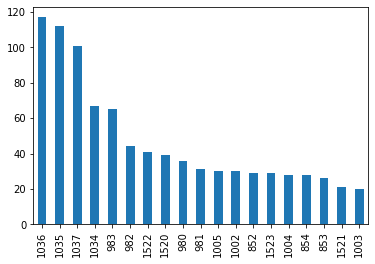

In [ ]:
# Gráfico de barras
df["LojaID"].value_counts().plot.bar()

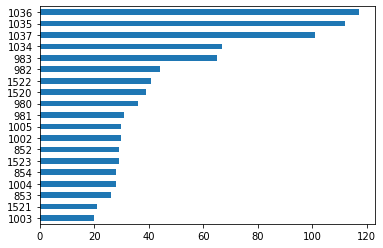

In [ ]:
# Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

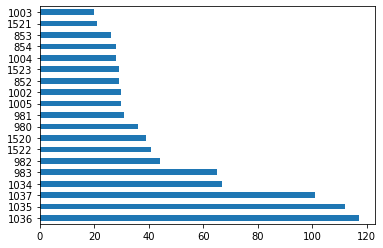

In [ ]:
# Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh();

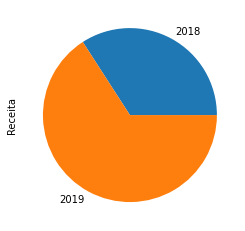

In [ ]:
# Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

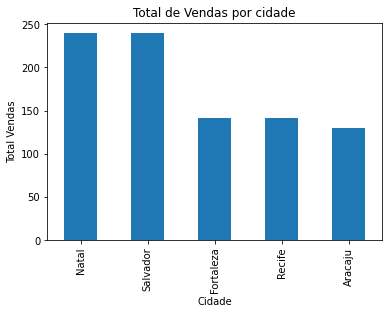

In [ ]:
# Adicionando o título e alterando o nome dos eixos
import matplotlib.pyplot as plt

df["Cidade"].value_counts().plot.bar(title="Total de Vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

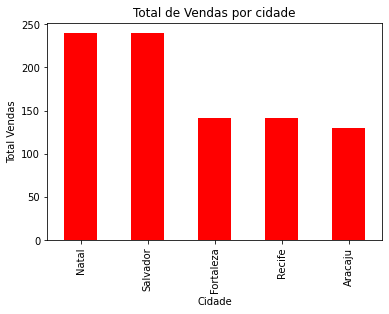

In [ ]:
# Alterando a cor
import matplotlib.pyplot as plt

df["Cidade"].value_counts().plot.bar(title="Total de Vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
# Alterando o estilo
plt.style.use("ggplot")

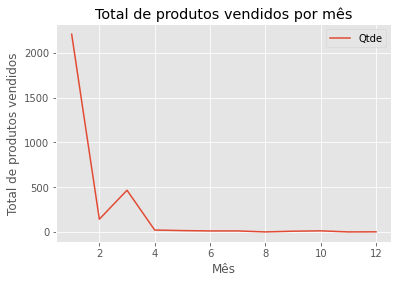

In [ ]:
df.groupby(df['mes_venda'])["Qtde"].sum().plot(title="Total de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

In [ ]:
df.groupby(df['mes_venda'])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
# Selecione aenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

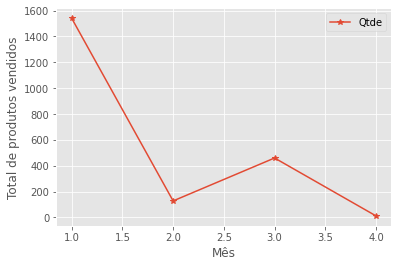

In [ ]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "*")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

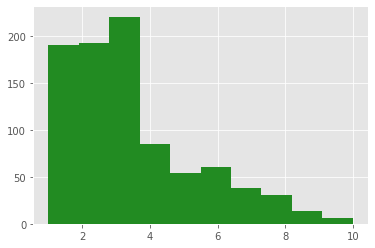

In [ ]:
# Histograma
plt.hist(df["Qtde"], color="forestgreen");

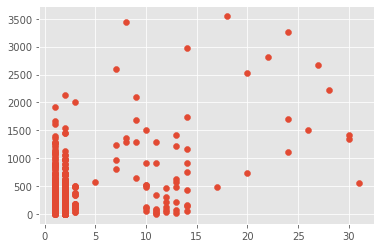

In [ ]:
plt.scatter(x=df_2019['dia_venda'], y = df_2019['Receita']);

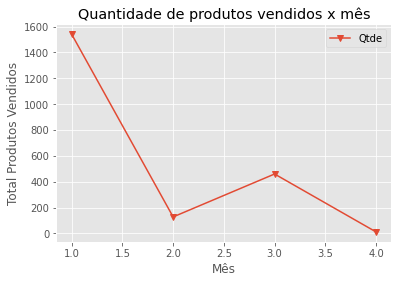

In [ ]:
# Salvando em png

df_2019.groupby(df_2019['mes_venda'])["Qtde"].sum().plot(marker="v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("Grafico de quantidade x mes.png")